# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

SIMON Robin 4IR-C
MURAT Félix 4IR-C

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

---- 6 configurations ----
---------------------------------

max_depth=10, splitter="best", min_samples_leaf=400

max_depth=10, splitter="best", min_samples_leaf=60

max_depth=20, splitter="best", min_samples_leaf=20

max_depth=10, splitter="random", min_samples_leaf=100

max_depth=20, splitter="random", min_samples_leaf=10

max_depth=20, splitter="random", min_samples_leaf=1

Train a decision tree for each of the previous configurations on the full dataset

In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt # for a good visualization of the trees

import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

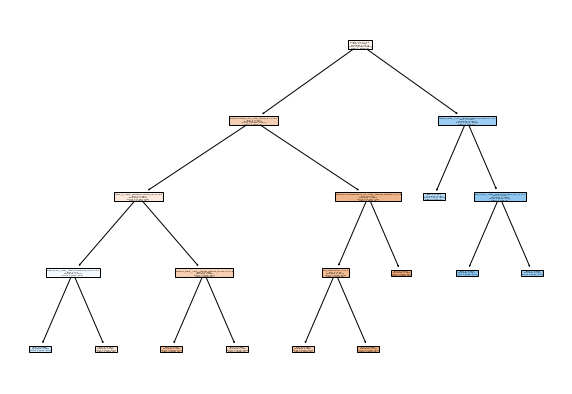

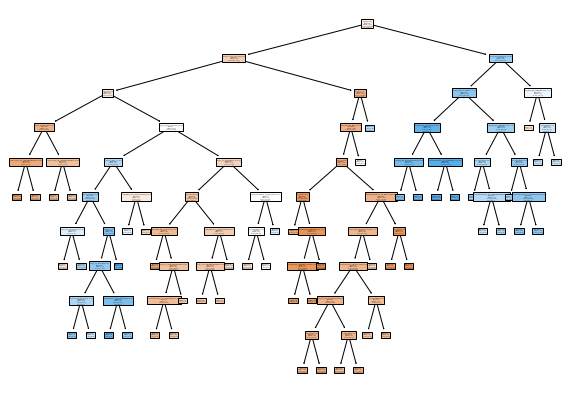

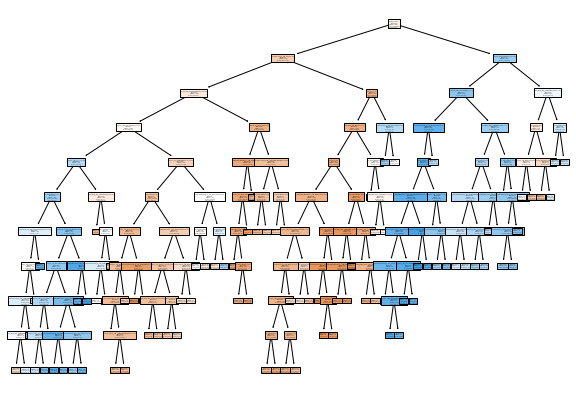

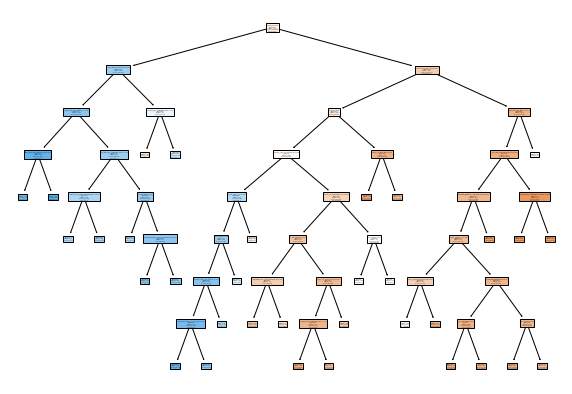

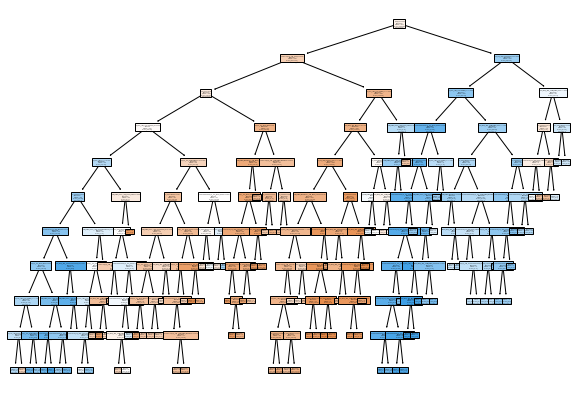

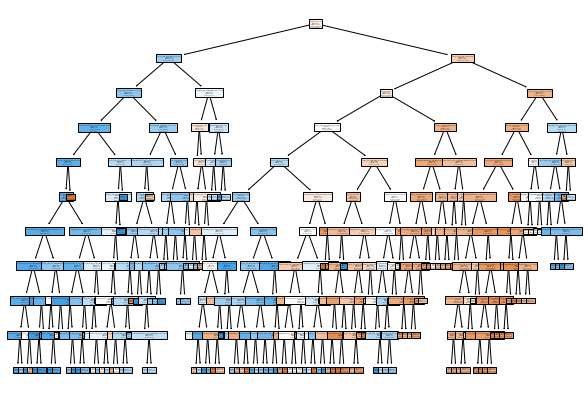

In [3]:
min_samples_list = [400, 60, 20, 100, 10, 1]

for i in range(6):
    
    if i < 3:
        split = "best"
    else:
        split = "random"
        
    samples = min_samples_list[i]
        
    clf = tree.DecisionTreeClassifier(max_depth=10, splitter=split, min_samples_leaf=samples)
    clf = clf.fit(train_examples, train_labels)

    text_representation = tree.export_text(clf)
             
    fig = plt.figure(figsize=(10,7))
    _ = tree.plot_tree(
        clf, 
        feature_names=(features),
        class_names=("false (0)", "true (1)" ), 
        filled=True
    )



Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [4]:
from sklearn.model_selection import KFold

tests = [
    [1000, "best", 20],
    [1000, "random", 20]
]
NB_TESTS = 20

def evaluate(test_list, nb_tests):
    
    train_accuracies = []
    test_accuracies = []

    for j in range(len(test_list)):
        #On effectue un certain nombre de tests et on prend la moyenne des résultats
        somme_test = 0
        somme_train = 0

        for i in range(NB_TESTS):
            kf = KFold(n_splits=5)
            clf = tree.DecisionTreeClassifier(max_depth=test_list[j][0], splitter=test_list[j][1], min_samples_leaf=test_list[j][2])

            n = 0
            for train_index, test_index in kf.split(train_examples):
                X_train_k, X_test_k = train_examples[train_index], train_examples[test_index]
                y_train_k, y_test_k = train_labels[train_index], train_labels[test_index]
                clf = clf.fit(X_train_k, y_train_k)
                #print(clf.score(X_test_k, y_test_k))
                #print(clf.score(X_train_k, y_train_k))
                #print("-------------------------")
                somme_test += clf.score(X_test_k, y_test_k)
                somme_train += clf.score(X_train_k, y_train_k)
                n += 1
        train_accuracy = 100*somme_train/(n*NB_TESTS)
        test_accuracy = 100*somme_test/(n*NB_TESTS)
        print(f"Test n°{j+1}/{len(test_list)} : {train_accuracy} - {test_accuracy}")
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
    return train_accuracies, test_accuracies

evaluate(tests, NB_TESTS)

Test n°1/2 : 68.46198489503838 - 66.56754228980999
Test n°2/2 : 68.46198489503838 - 66.56659352320658


([68.46198489503838, 68.46198489503838],
 [66.56754228980999, 66.56659352320658])

Propose an experimental study that shows the transition phase from underfitting to overfitting 

Test n°1/40 : 69.6994078695904 - 64.70867559376607
Test n°2/40 : 68.66585388796943 - 66.27352176767357
Test n°3/40 : 68.30551600489592 - 66.62722465534138
Test n°4/40 : 68.15380780413643 - 66.56657553710984
Test n°5/40 : 67.94046351087809 - 66.26306015450052
Test n°6/40 : 67.72473662519943 - 66.27243990395426
Test n°7/40 : 67.42842529409569 - 66.31709038912919
Test n°8/40 : 67.41894100285337 - 66.23846866372293
Test n°9/40 : 67.24351814046308 - 65.51781972535225
Test n°10/40 : 67.07757057840014 - 65.266485606626
Test n°11/40 : 66.99224005382861 - 65.19447107385984
Test n°12/40 : 66.96853775470558 - 65.2561364065577
Test n°13/40 : 66.70777762455758 - 64.83982481541766
Test n°14/40 : 66.63191228553433 - 65.12418500499113
Test n°15/40 : 66.50864347212944 - 64.89664289504209
Test n°16/40 : 66.55603121241026 - 65.12431090766832
Test n°17/40 : 66.55603121241026 - 65.12431090766832
Test n°18/40 : 66.4943906244539 - 65.14326825363995
Test n°19/40 : 66.4943906244539 - 65.14326825363995
Test n°2

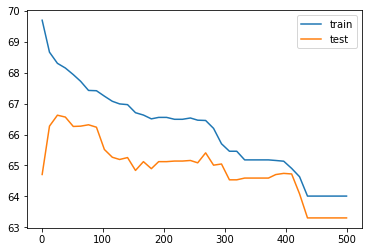

In [5]:
#On trace l'évolution des scores de tests et d'entraînement
#Phase overfitting: Training > Testing
#Phase underfitting: Training < Testing

tests2 = []

min_samples_list = np.linspace(1, 500, 40).astype(int)

for min_samples in min_samples_list:
    tests2.append([100, "best", min_samples])

train_results, test_results = evaluate(tests2, 5)
xaxis = min_samples_list
plt.plot(xaxis, train_results, label="train")
plt.plot(xaxis, test_results, label="test")
plt.legend()
plt.show()

Le graphe montre l'évolution des score de test et d'entraînement selon le nombre d'échantillons minimum.

Au tout début (entre 0 et 10 échantillons minimum), on peut voir la phase d'overfitting : le tests passent moins de 65% du temps mais l'entraînement donne un score de plus de 69%. Cel s'explique par le fait que si toutes les feuilles sont prises en compte même quand elles sont formées par un très faible nombre d'échantillons, on prend en compte du bruit.

Après 400 échantillons minimum, on ignore trop de feuilles significatives et le modèle devient trop grossier. Ainsi, les deux scores baissent drastiquement (si on continue au delà de 500, les scores vont baisser énormément).

Construct the confusion matrix on a particular good configuration (after explaining your choice)

Provide an evaluation of the fairness of the model based on the False Positive Rate